<a href="https://colab.research.google.com/github/phamngocduc/MachineLearning/blob/master/Confusion_matrix_for_foftmax_vs_svm_iris_database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**0.Khai báo các thư viện cần thiết**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.sparse
import numpy as np 
import seaborn as sns
from sklearn import metrics

**1. Download dữ liệu**

In [0]:
%matplotlib inline
#from sklearn.datasets import fetch_mldata
from sklearn.datasets import load_iris
# Change data_home to wherever to where you want to download your data
# mnist = fetch_mldata('MNIST original')
irisdata = load_iris()
# irisdata if we would have an overlook at the dataset

**2. Tách tập dữ liệu ra làm 2 phần bằng nhau và tiền xử lý**

In [93]:
from sklearn.model_selection import train_test_split
train_iris, test_iris, train_lbl, test_lbl = train_test_split(
      irisdata.data, irisdata.target, test_size=1/2.0, random_state=0)

# check the scale of the two splitted datasets\
print(train_iris.shape)
print(train_lbl.shape)
print(test_iris.shape)
print(test_lbl.shape)
#train_irisandlbl = np.concatenate((train_iris, train_lbl),axis=0)


(75, 4)
(75,)
(75, 4)
(75,)


In [0]:
# Print some sample training data

In [0]:
# Data normalization if neccessary

**3. Định nghĩa các hàm sẽ sử dụng**

a. Tìm các ví dụ phân lớp sai 

In [0]:
def find_misClassification(test_label,predictions):
    index = 0
    misclassifiedIndexes = []
    for label, predict in zip(test_lbl, predictions):
        if label != predict: 
            misclassifiedIndexes.append(index)
        index +=1
    return misclassifiedIndexes 

b. Visualize các ví dụ sai 

In [0]:
#def draw_misclassified_samples(predictions, misclassifiedIndexes, index):
# plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], test_lbl[badIndex]), fontsize = 15)        

c. Vẽ ma trận lỗi

In [0]:
def draw_confusion_matrix_with_seaborn(test_label, predictions, score):
    cm = metrics.confusion_matrix(test_lbl, predictions)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicte   d label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);
    #plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
    plt.show()

In [0]:
def draw_confusion_matrix_with_matplotlib(test_label, predictions, score):
    cm = metrics.confusion_matrix(test_lbl, predictions)
    plt.figure(figsize=(9,9))
    plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
    plt.title('Confusion matrix', size = 15)
    plt.colorbar()
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
    plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
    plt.tight_layout()
    plt.ylabel('Actual label', size = 15)
    plt.xlabel('Predicted label', size = 15)
    width, height = cm.shape

    for x in range(width):
        for y in range(height):
             plt.annotate(str(cm[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')
#plt.savefig('toy_Digits_ConfusionMatplotlibCodementor.png')

**4. Lựa chọn và huấn luyện mô hình **

In [0]:
from sklearn.linear_model import LogisticRegression 
logisticRegr = LogisticRegression(solver='lbfgs', multi_class='multinomial')


In [101]:
logisticRegr.fit(train_iris, train_lbl)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

**5. Đánh giá mô hình**

In [102]:
logisticRegr.predict(test_iris[0].reshape(1,-1))


array([2])

In [103]:
logisticRegr.predict(test_iris[0:70])

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 0, 2, 1, 1, 1,
       1, 2, 0, 0])

In [104]:
test_lbl[0:70]

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1,
       1, 2, 0, 0])

In [105]:
softmax_predictions = logisticRegr.predict(test_iris)
softmax_score = logisticRegr.score(test_iris, test_lbl)
print(softmax_score)

0.9333333333333333


In [106]:
soft_max_misclassifiedIndexes = find_misClassification(test_lbl,softmax_predictions )
print(len(soft_max_misclassifiedIndexes))
#draw_misclassified_samples(softmax_predictions, soft_max_misclassifiedIndexes, 5)

5


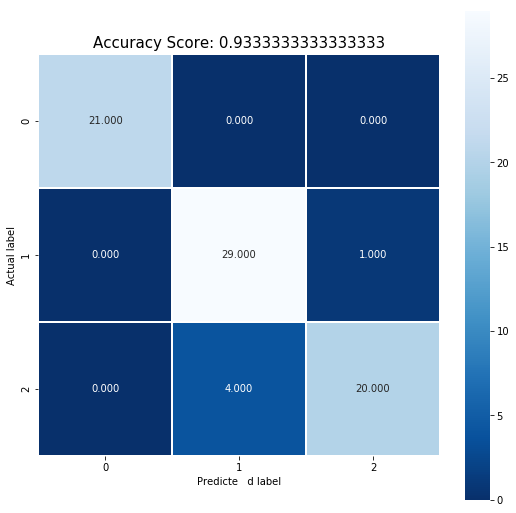

In [107]:
draw_confusion_matrix_with_seaborn(test_lbl, softmax_predictions, softmax_score)

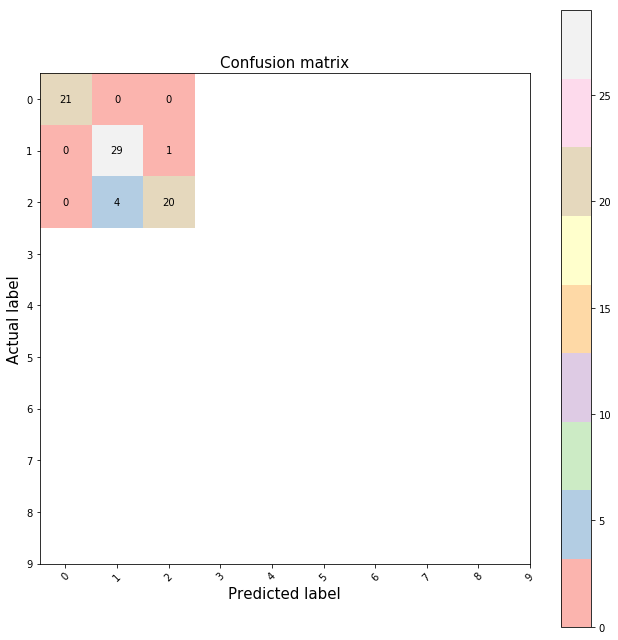

In [108]:
draw_confusion_matrix_with_matplotlib(test_lbl, softmax_predictions, softmax_score)

**Support Vector Machine with Radial basis function kernel**

In [0]:
from sklearn.svm import SVC
svm_classifier = SVC(C=200,kernel='rbf',gamma=0.01,cache_size=8000,probability=False)

In [110]:
svm_classifier.fit(train_iris,train_lbl)

SVC(C=200, cache_size=8000, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [111]:
svm_classifier.predict(test_iris[0].reshape(1,-1))

array([2])

In [112]:
svm_predictions = svm_classifier.predict(test_iris)
svm_score = svm_classifier.score(test_iris, test_lbl)
print(svm_score)

0.9333333333333333


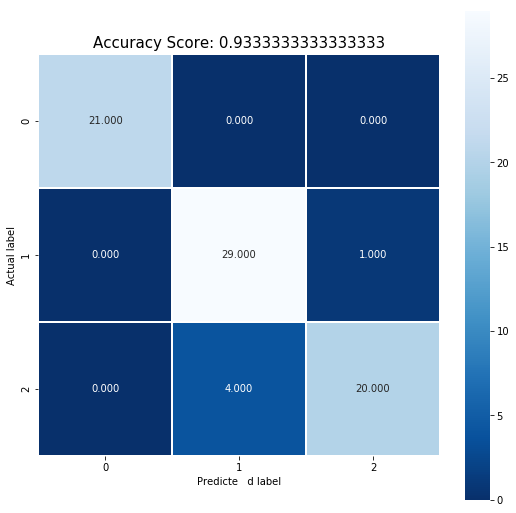

In [113]:
draw_confusion_matrix_with_seaborn(test_lbl, svm_predictions, svm_score)

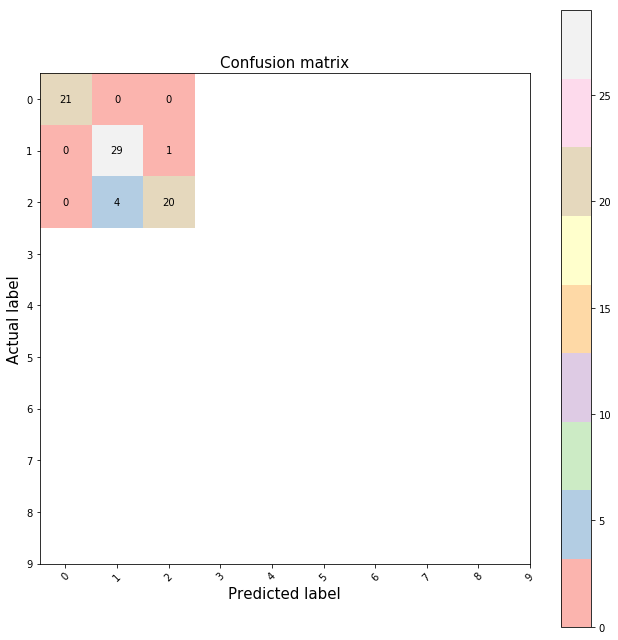

In [114]:
draw_confusion_matrix_with_matplotlib(test_lbl, svm_predictions, svm_score)

**Support Vector Machine with Polynominal kernel**

In [0]:
from sklearn.svm import SVC
svm_poly_classifier = SVC(C=200,kernel='poly',gamma=0.01,cache_size=8000,probability=False)

In [116]:
svm_poly_classifier.fit(train_iris,train_lbl)


SVC(C=200, cache_size=8000, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [117]:
svm_poly_predictions = svm_poly_classifier.predict(test_iris)
svm_poly_score = svm_poly_classifier.score(test_iris, test_lbl)
print(svm_poly_score)

0.9333333333333333


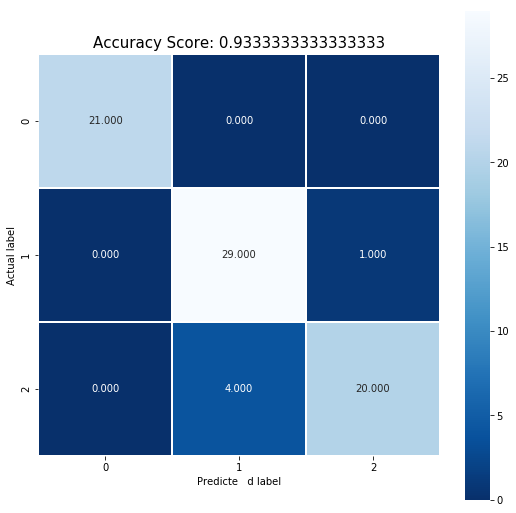

In [118]:
draw_confusion_matrix_with_seaborn(test_lbl, svm_poly_predictions, svm_poly_score)